In [2]:
import tensorflow_datasets as tfds
import tensorflow as tf
import matplotlib.pyplot as plt

# Load the dataset with pixel-wise annotations
dataset, info = tfds.load('oxford_iiit_pet:3.*.*', with_info=True)

# Print some basic information
print(info)

# Split the dataset
train_dataset = dataset['train']
test_dataset = dataset['test']

tfds.core.DatasetInfo(
    name='oxford_iiit_pet',
    full_name='oxford_iiit_pet/3.2.0',
    description="""
    The Oxford-IIIT pet dataset is a 37 category pet image dataset with roughly 200
    images for each class. The images have large variations in scale, pose and
    lighting. All images have an associated ground truth annotation of breed.
    """,
    homepage='http://www.robots.ox.ac.uk/~vgg/data/pets/',
    data_dir='/root/tensorflow_datasets/oxford_iiit_pet/3.2.0',
    file_format=tfrecord,
    download_size=773.52 MiB,
    dataset_size=774.69 MiB,
    features=FeaturesDict({
        'file_name': Text(shape=(), dtype=string),
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=37),
        'segmentation_mask': Image(shape=(None, None, 1), dtype=uint8),
        'species': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    spl

In [3]:
def preprocess_data(sample):
    image = tf.image.resize(sample['image'], (128, 128))
    image = tf.cast(image, tf.float32) / 255.0
    mask = tf.image.resize(sample['segmentation_mask'], (128, 128))
    mask = tf.cast(mask, tf.float32)

    mask = tf.where(mask == 2.0, 0.0, mask)
    mask = tf.where(mask > 0.0, 1.0, mask)
    return image, mask

train_dataset = train_dataset.map(preprocess_data)
test_dataset = test_dataset.map(preprocess_data)


In [4]:
from tensorflow.keras import layers, models

def simple_cnn_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(128, 128, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2DTranspose(512, (3, 3), strides=2, activation='relu', padding='same'))
    model.add(layers.Conv2DTranspose(256, (3, 3), strides=2, activation='relu', padding='same'))
    model.add(layers.Conv2DTranspose(128, (3, 3), strides=2, activation='relu', padding='same'))
    model.add(layers.Conv2DTranspose(64, (3, 3), strides=2, activation='relu', padding='same'))
    model.add(layers.Conv2DTranspose(32, (3, 3), strides=2, activation='relu', padding='same'))

    model.add(layers.Conv2D(2, (1, 1), activation='softmax'))

    return model

model = simple_cnn_model()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()






/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose (Conv2DTranspose)   │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_1 (Conv2DTranspose) │ (None, 16, 16, 256)         │       1,179,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_2 (Conv2DTranspose) │ (None, 32, 32, 128)         │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_3 (Conv2DTranspose) │ (None, 64, 64, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_4 (Conv2DTranspose) │ (None, 128, 128, 32)        │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 128, 128, 2)         │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,495,650 (20.96 MB)

 Trainable params: 5,495,650 (20.96 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
train_size = int(0.8 * len(train_dataset))
val_size = int(0.2 * len(train_dataset))

train_data = train_dataset.take(train_size)
val_data = train_dataset.skip(train_size)

history = model.fit(train_data.batch(32), validation_data=val_data.batch(32), epochs=10)


Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 38s 253ms/step - accuracy: 0.6358 - loss: 0.6240 - val_accuracy: 0.7417 - val_loss: 0.5382
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 26s 204ms/step - accuracy: 0.7440 - loss: 0.5311 - val_accuracy: 0.7439 - val_loss: 0.5239
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 19s 204ms/step - accuracy: 0.7470 - loss: 0.5219 - val_accuracy: 0.7479 - val_loss: 0.5174
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 20s 216ms/step - accuracy: 0.7590 - loss: 0.5032 - val_accuracy: 0.7856 - val_loss: 0.4650
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 17s 189ms/step - accuracy: 0.8041 - loss: 0.4309 - val_accuracy: 0.8178 - val_loss: 0.4053
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 17s 187ms/step - accuracy: 0.8247 - loss: 0.3906 - val_accuracy: 0.8283 - val_loss: 0.3793
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 19s 205ms/step - accuracy: 0.8466 - loss: 0.3482 - val_accuracy: 0.8478 - val_loss: 0.3457
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 17s 190ms/step - accuracy: 0.8595 - loss: 0.3223 - val_accu

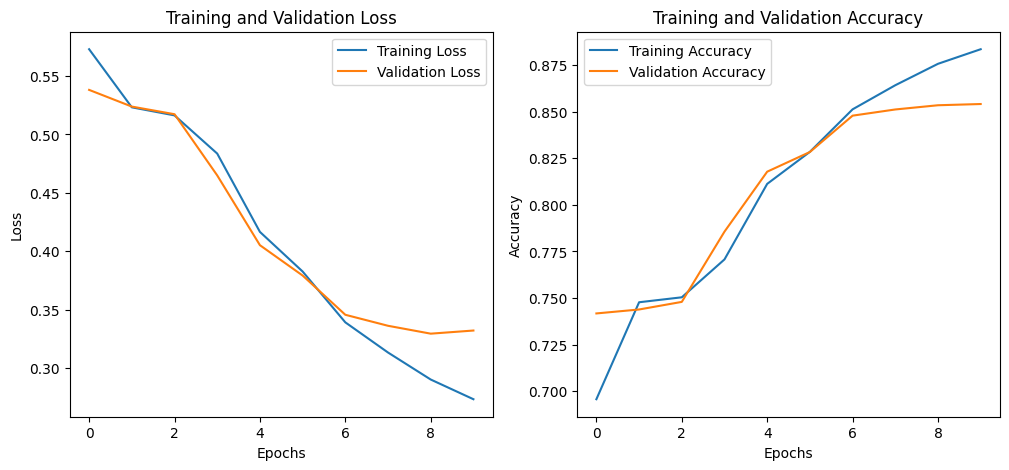

In [6]:
import matplotlib.pyplot as plt
# Plot for training & validation loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot for training & validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


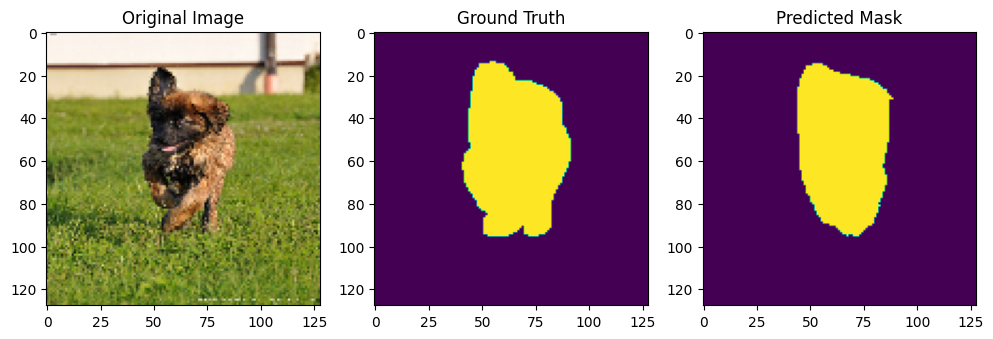

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


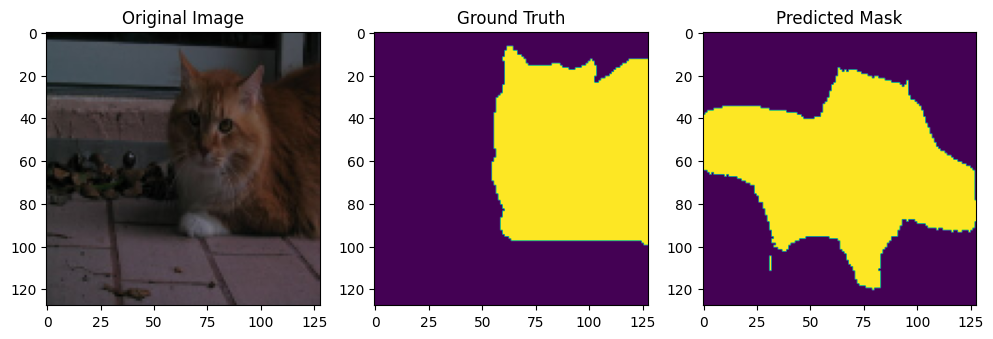

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


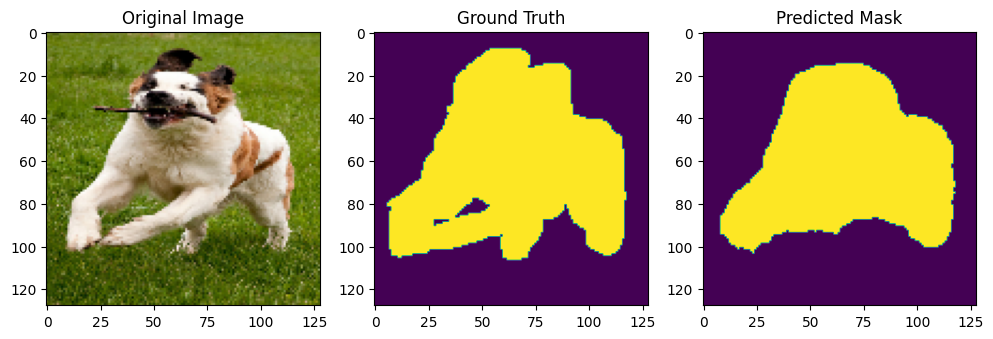

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


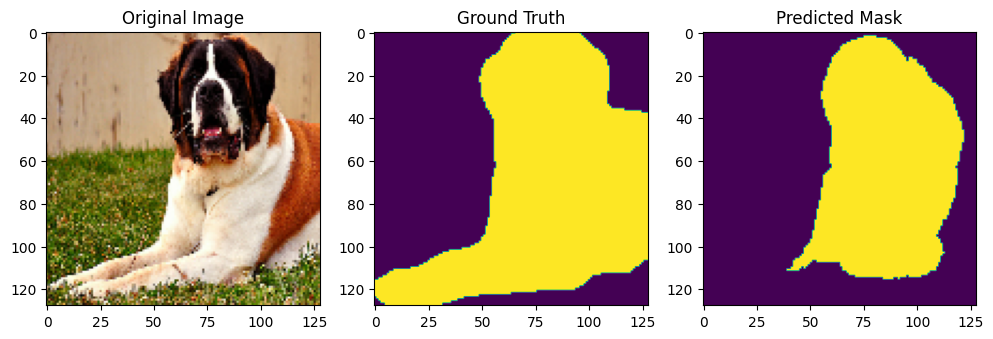

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


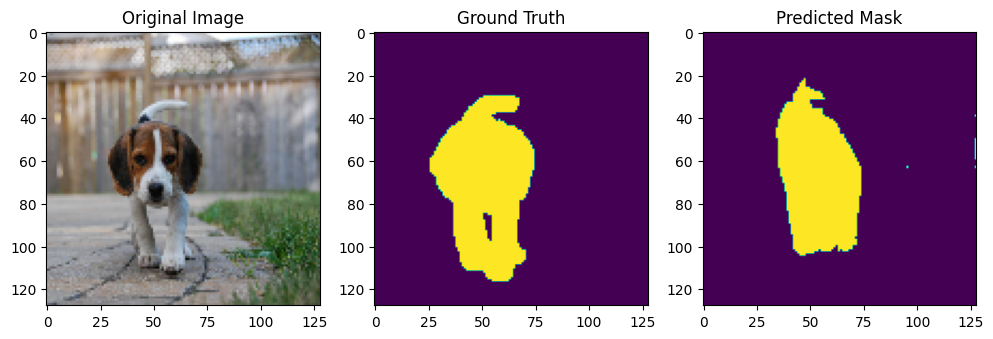

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


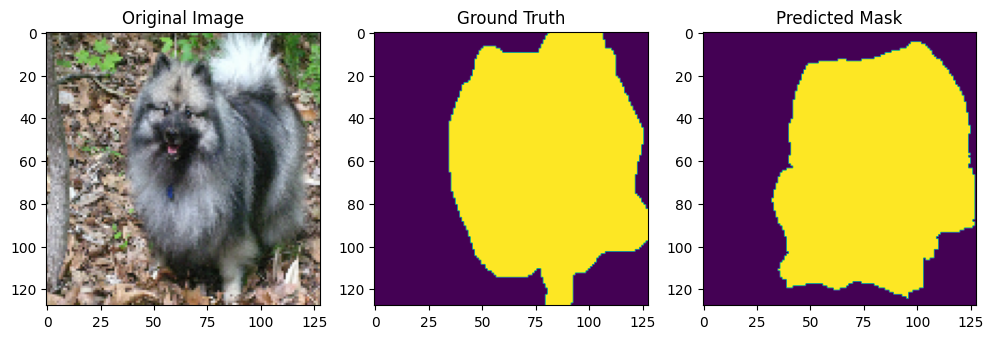

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


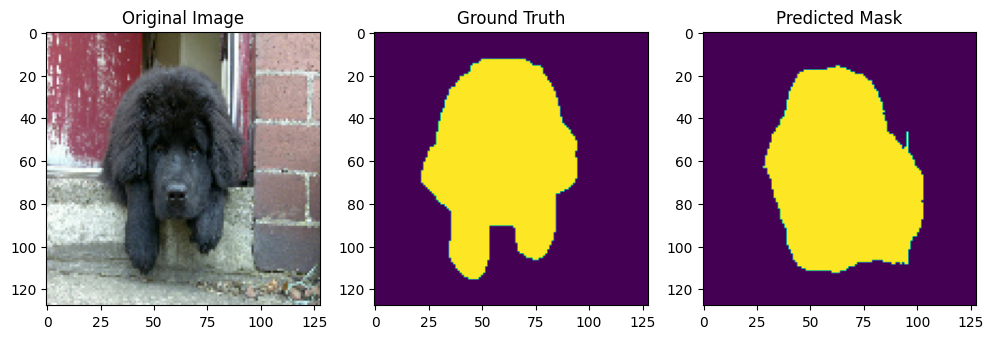

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


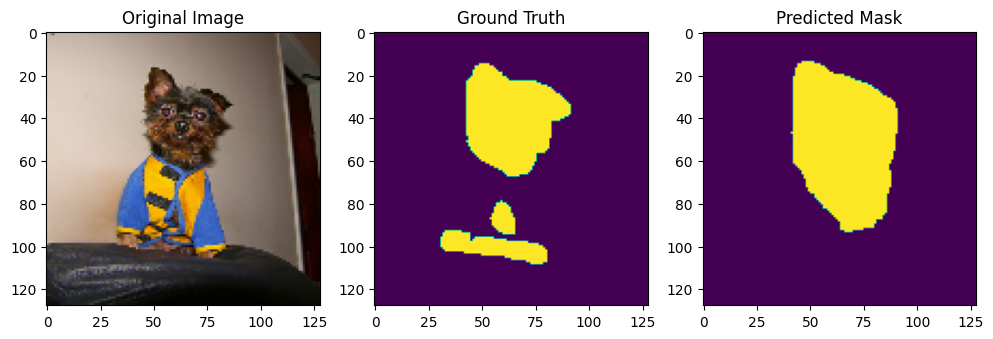

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


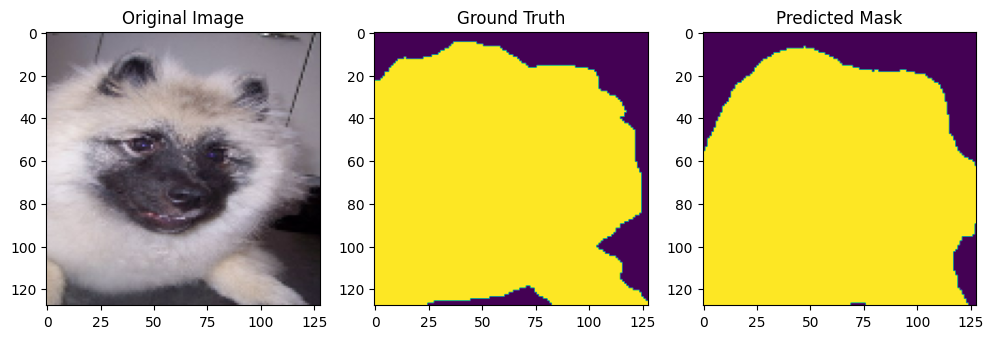

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


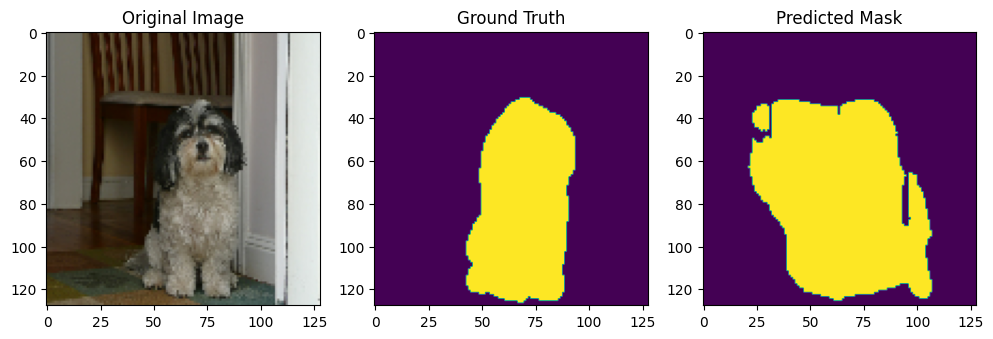

In [7]:
import numpy as np

for image, label in test_dataset.take(10):
    # Add batch dimension, make prediction, and remove batch dimension for visualization
    pred_mask = model.predict(image[tf.newaxis, ...])
    pred_mask = np.argmax(pred_mask, axis=-1)[0]

    # Plot original image, ground truth, and prediction
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 3, 1)
    plt.imshow(image)
    plt.title("Original Image")

    plt.subplot(1, 3, 2)
    plt.imshow(tf.squeeze(label))  # Ground truth
    plt.title("Ground Truth")

    plt.subplot(1, 3, 3)
    plt.imshow(pred_mask)  # Model prediction
    plt.title("Predicted Mask")

    plt.show()

In [8]:
# Evaluate on the test dataset
test_loss, test_accuracy = model.evaluate(test_dataset.batch(32), verbose=1)

# Print the testing accuracy
print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")

115/115 ━━━━━━━━━━━━━━━━━━━━ 14s 123ms/step - accuracy: 0.8601 - loss: 0.3192
Testing Accuracy: 86.03%


In [9]:
# Split the training dataset into training and validation sets
val_size = 1000
val_dataset = train_dataset.take(val_size)
train_dataset = train_dataset.skip(val_size)

# Batch and prefetch the datasets
BATCH_SIZE = 16
BUFFER_SIZE = 1000

train_dataset = train_dataset.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
val_dataset = val_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)


# Define the U-Net model (same as before)
def unet_model(input_size=(128, 128, 3)):
    inputs = tf.keras.Input(input_size)

    # Encoder (Contracting Path)
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c1)
    p1 = layers.MaxPooling2D((2, 2))(c1)

    c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c2)
    p2 = layers.MaxPooling2D((2, 2))(c2)

    c3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
    c3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c3)
    p3 = layers.MaxPooling2D((2, 2))(c3)

    c4 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(p3)
    c4 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(c4)
    p4 = layers.MaxPooling2D(pool_size=(2, 2))(c4)

    # Bottleneck
    c5 = layers.Conv2D(1024, (3, 3), activation='relu', padding='same')(p4)
    c5 = layers.Conv2D(1024, (3, 3), activation='relu', padding='same')(c5)

    # Decoder (Expanding Path)
    u6 = layers.Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = layers.concatenate([u6, c4])
    c6 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(u6)
    c6 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(c6)

    u7 = layers.Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = layers.concatenate([u7, c3])
    c7 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(u7)
    c7 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c7)

    u8 = layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = layers.concatenate([u8, c2])
    c8 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(u8)
    c8 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c8)

    u9 = layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = layers.concatenate([u9, c1], axis=3)
    c9 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(u9)
    c9 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c9)

    outputs = layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)

    model = models.Model(inputs=[inputs], outputs=[outputs])
    return model

# Instantiate the model
model = unet_model()
model.summary()

Model: "functional_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 128, 128, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_6 (Conv2D)         │ (None, 128, 128, 64)   │          1,792 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_7 (Conv2D)         │ (None, 128, 128, 64)   │         36,928 │ conv2d_6[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_5           │ (None, 64, 64, 64)     │              0 │ conv2d_7[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_8 (Conv2D)         │ (None, 64, 64, 128)    │         73,856 │ max_pooling2d_5[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_9 (Conv2D)         │ (None, 64, 64, 128)    │        147,584 │ conv2d_8[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_6           │ (None, 32, 32, 128)    │              0 │ conv2d_9[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_10 (Conv2D)        │ (None, 32, 32, 256)    │        295,168 │ max_pooling2d_6[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_11 (Conv2D)        │ (None, 32, 32, 256)    │        590,080 │ conv2d_10[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_7           │ (None, 16, 16, 256)    │              0 │ conv2d_11[0][0]        │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_12 (Conv2D)        │ (None, 16, 16, 512)    │      1,180,160 │ max_pooling2d_7[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_13 (Conv2D)        │ (None, 16, 16, 512)    │      2,359,808 │ conv2d_12[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_8           │ (None, 8, 8, 512)      │              0 │ conv2d_13[0][0]        │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_14 (Conv2D)        │ (None, 8, 8, 1024)     │      4,719,616 │ max_pooling2d_8[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_15 (Conv2D)        │ (None, 8, 8, 1024)     │      9,438,208 │ conv2d_14[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_transpose_5        │ (None, 16, 16, 512)    │      2,097,664 │ conv2d_15[0][0]        │
│ (Conv2DTranspose)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concaten

 Total params: 31,031,745 (118.38 MB)

 Trainable params: 31,031,745 (118.38 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
def dice_coefficient(y_true, y_pred):
    y_true_f = tf.cast(tf.reshape(y_true, [-1]), tf.float32)
    y_pred_f = tf.cast(tf.reshape(y_pred, [-1]), tf.float32)
    intersection = tf.reduce_sum(y_true_f * y_pred_f)
    return (2. * intersection + 1e-7) / (tf.reduce_sum(y_true_f) + tf.reduce_sum(y_pred_f) + 1e-7)

def dice_loss(y_true, y_pred):
    return 1 - dice_coefficient(y_true, y_pred)

def combined_loss(y_true, y_pred):
    dice = dice_loss(y_true, y_pred)
    bce = tf.keras.losses.binary_crossentropy(y_true, y_pred)
    return dice + bce

# Compile the model
model.compile(optimizer='adam', loss=combined_loss, metrics=[dice_coefficient])

In [11]:
# Set up callbacks
checkpoint_path = 'unet_weights.keras'
callbacks = [
    tf.keras.callbacks.ModelCheckpoint(checkpoint_path, save_best_only=True, monitor='val_loss'),
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
]

# Train the model
EPOCHS = 20

history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=EPOCHS,
    callbacks=callbacks
)


from tensorflow.keras.models import load_model

# Define custom objects
custom_objects = {
    'dice_loss': dice_loss,
    'dice_coefficient': dice_coefficient
}

# Load the best model weights
model.load_weights(checkpoint_path)


Epoch 1/20
168/168 ━━━━━━━━━━━━━━━━━━━━ 116s 461ms/step - dice_coefficient: 0.4604 - loss: 1.5286 - val_dice_coefficient: 0.5824 - val_loss: 1.0219
Epoch 2/20
168/168 ━━━━━━━━━━━━━━━━━━━━ 42s 250ms/step - dice_coefficient: 0.6149 - loss: 0.9349 - val_dice_coefficient: 0.7008 - val_loss: 0.7539
Epoch 3/20
168/168 ━━━━━━━━━━━━━━━━━━━━ 77s 222ms/step - dice_coefficient: 0.6279 - loss: 0.9309 - val_dice_coefficient: 0.6770 - val_loss: 0.8901
Epoch 4/20
168/168 ━━━━━━━━━━━━━━━━━━━━ 42s 230ms/step - dice_coefficient: 0.6581 - loss: 0.8480 - val_dice_coefficient: 0.5720 - val_loss: 0.9482
Epoch 5/20
168/168 ━━━━━━━━━━━━━━━━━━━━ 39s 221ms/step - dice_coefficient: 0.6425 - loss: 0.8717 - val_dice_coefficient: 0.6829 - val_loss: 0.7549
Epoch 6/20
168/168 ━━━━━━━━━━━━━━━━━━━━ 44s 260ms/step - dice_coefficient: 0.7105 - loss: 0.7215 - val_dice_coefficient: 0.7047 - val_loss: 0.6996
Epoch 7/20
168/168 ━━━━━━━━━━━━━━━━━━━━ 44s 263ms/step - dice_coefficient: 0.7394 - loss: 0.6626 - val_dice_coefficie

In [14]:
# Evaluate on the test dataset
test_loss, test_accuracy = model.evaluate(test_dataset, verbose=1)

# Print the testing accuracy
print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")

230/230 ━━━━━━━━━━━━━━━━━━━━ 24s 102ms/step - dice_coefficient: 0.8575 - loss: 0.3938
Testing Accuracy: 85.72%


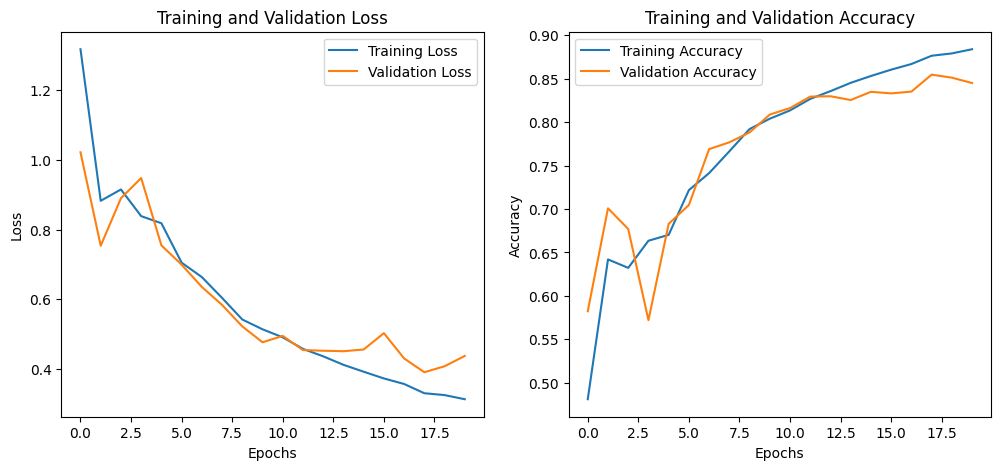

In [21]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot training & validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['dice_coefficient'], label='Training Accuracy')
plt.plot(history.history['val_dice_coefficient'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


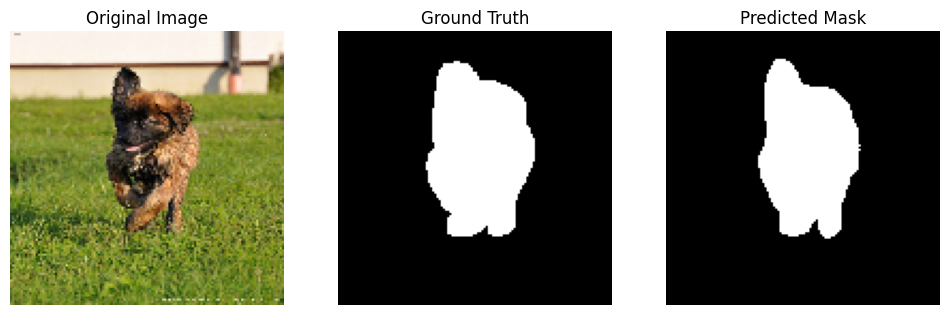

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


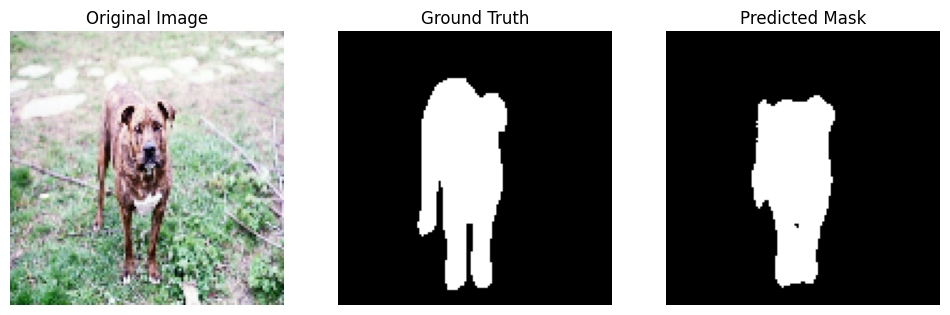

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


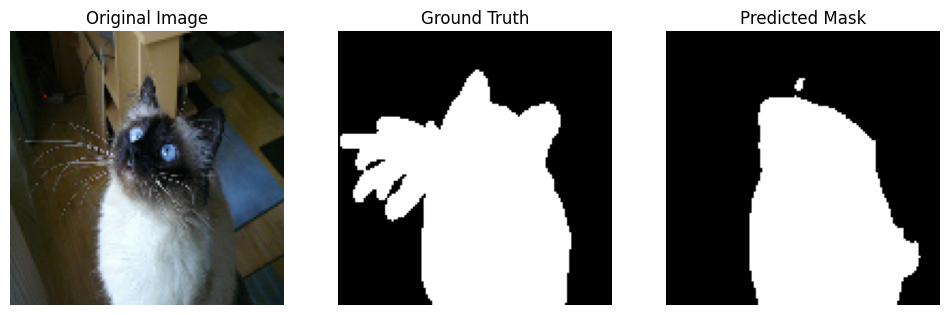

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


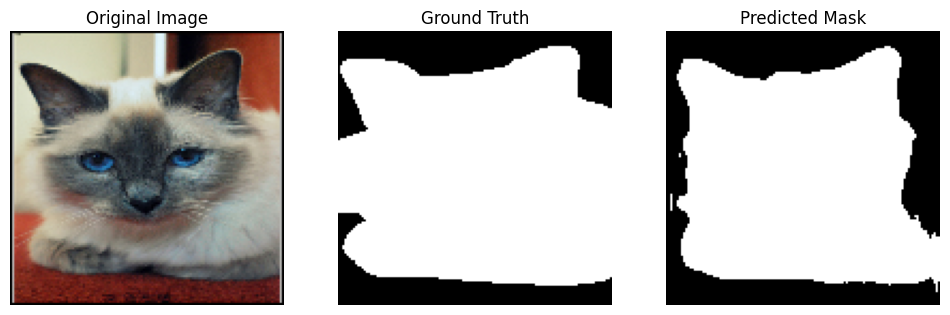

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


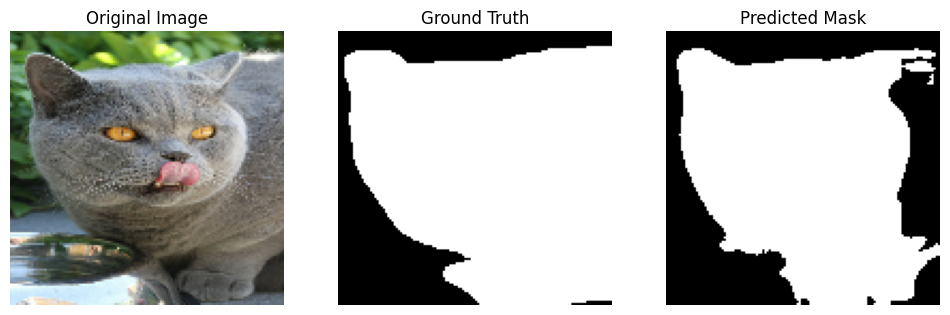

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


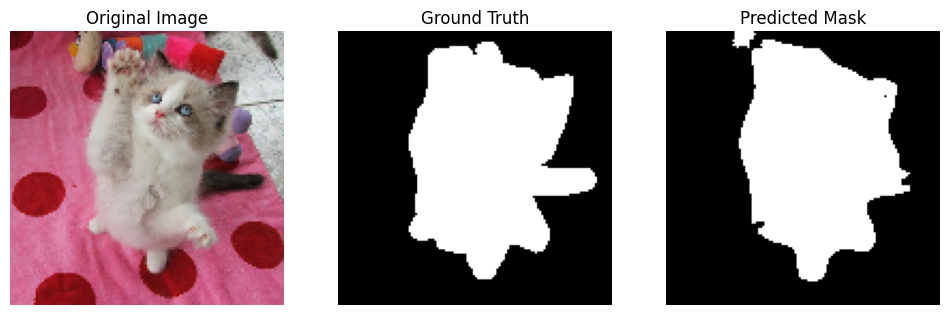

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


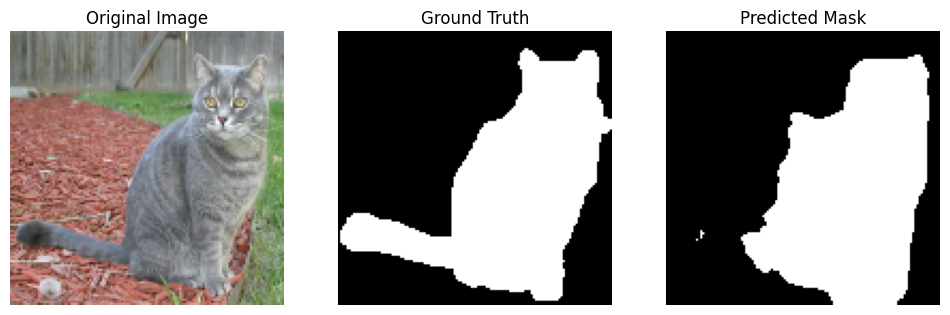

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


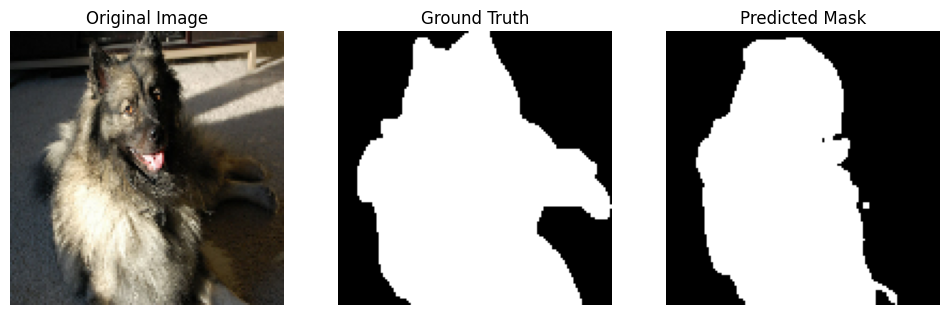

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


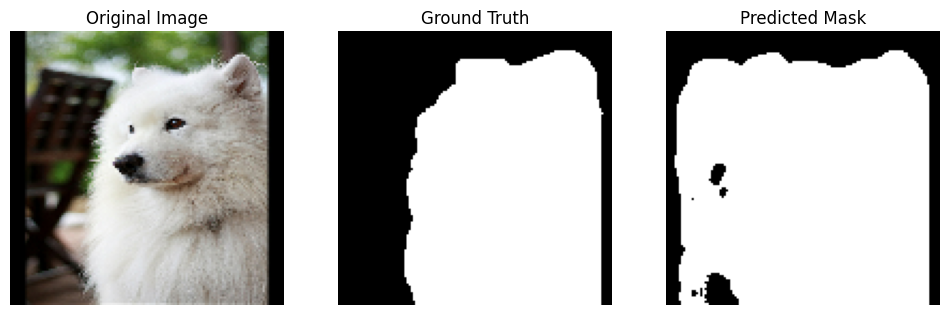

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


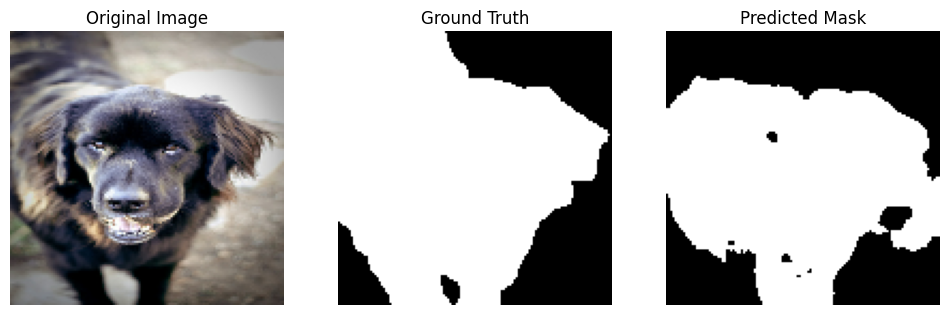

In [27]:
for image, label in test_dataset.take(10):
    if image.shape[0] != 1:
        image = image[0]
        label = label[0]

    input_image = image[tf.newaxis, ...]
    pred_mask = model.predict(input_image)
    pred_mask = pred_mask[0, ..., 0]
    pred_mask_binary = (pred_mask > 0.5).astype(np.uint8)


    plt.figure(figsize=(12, 4))

    plt.subplot(1, 3, 1)
    plt.imshow(image)
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(tf.squeeze(label), cmap='gray')  # Ground truth mask
    plt.title("Ground Truth")
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(pred_mask_binary, cmap='gray')  # Predicted mask
    plt.title("Predicted Mask")
    plt.axis('off')

    plt.show()


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/3680 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/oxford_iiit_pet/incomplete.GVM1RX_3.2.0/oxford_iiit_pet-train.tfrecord*...…

Generating test examples...:   0%|          | 0/3669 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/oxford_iiit_pet/incomplete.GVM1RX_3.2.0/oxford_iiit_pet-test.tfrecord*...:…

Dataset oxford_iiit_pet downloaded and prepared to /root/tensorflow_datasets/oxford_iiit_pet/3.2.0. Subsequent calls will reuse this data.


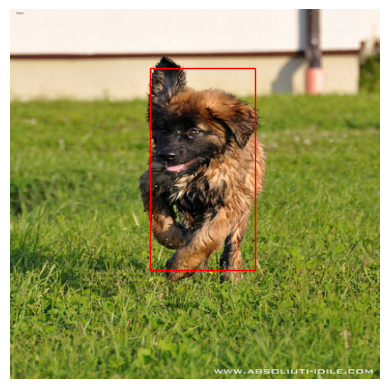

In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from matplotlib.patches import Rectangle
import numpy as np
import tensorflow_datasets as tfds
import tensorflow as tf
from tensorflow.keras import layers, models


dataset, info = tfds.load('oxford_iiit_pet', with_info=True)

def preprocess_data(example):
    image=tf.image.resize(example['image'], (416, 416))
    mask=tf.image.resize(example['segmentation_mask'], (416, 416))
    mask=tf.cast(mask, tf.int32)
    mask=tf.where(mask == 1, 1, 0)

    image = tf.cast(image, tf.float32) / 255.0

    return image, mask


def get_bounding_box(segmentation_mask):
    pet_pixels = np.argwhere(segmentation_mask > 0)

    if pet_pixels.shape[0] == 0:
        height, width = segmentation_mask.shape[:2]
        return 0, 0, width - 1, height - 1

    ymax, xmax = np.max(pet_pixels[:, 0]), np.max(pet_pixels[:, 1])
    ymin, xmin = np.min(pet_pixels[:, 0]), np.min(pet_pixels[:, 1])

    return xmin, ymin, xmax, ymax

def draw_boxes(image, v_boxes, v_labels=None, v_scores=None):
    plt.imshow(image)
    ax = plt.gca()

    for i, box in enumerate(v_boxes):
        xmin, ymin, xmax, ymax = box.xmin, box.ymin, box.xmax, box.ymax
        width, height = xmax - xmin, ymax - ymin

        rect = Rectangle((xmin, ymin), width, height, fill=False, color='red')
        ax.add_patch(rect)


        if v_labels and v_scores:
            label = f"{v_labels[i]} ({v_scores[i]:.2f})"
            plt.text(xmin, ymin, label, color='white', bbox=dict(facecolor='red', alpha=0.5))

    plt.axis('off')
    plt.show()

class BoundBox:
    def __init__(self, xmin, ymin, xmax, ymax, objness=None, classes=None):
        self.xmin = xmin
        self.ymin = ymin
        self.xmax = xmax
        self.ymax = ymax
        self.objness = objness
        self.classes = classes
        self.label = -1
        self.score = -1

    def get_label(self):
        if self.label == -1:
            self.label = np.argmax(self.classes)
        return self.label

    def get_score(self):
        if self.score == -1:
            self.score = self.classes[self.get_label()]
        return self.score



test_data = dataset['test'].map(preprocess_data).cache().batch(32).prefetch(tf.data.AUTOTUNE)

for images, mask in test_data.take(1):
    sample_image = images[0].numpy()
    sample_mask = mask[0].numpy()
    xmin, ymin, xmax, ymax = get_bounding_box(sample_mask)
    ground_truth = BoundBox(xmin, ymin, xmax, ymax)
    draw_boxes(sample_image.copy(), [ground_truth])


In [ ]:
import struct
import numpy as np
from keras.layers import LeakyReLU
from keras.layers import ZeroPadding2D
from keras.layers import UpSampling2D
from keras.layers import add, concatenate
from keras.models import Model
from keras.layers import Conv2D
from keras.layers import Input
from keras.layers import BatchNormalization


def _conv_block(inp, convs, skip=True):
	x = inp
	count = 0
	for conv in convs:
		if count == (len(convs) - 2) and skip:
			skip_connection = x
		count += 1
		if conv['stride'] > 1: x = ZeroPadding2D(((1,0),(1,0)))(x)
		x = Conv2D(conv['filter'],
				   conv['kernel'],
				   strides=conv['stride'],
				   padding='valid' if conv['stride'] > 1 else 'same',
				   name='conv_' + str(conv['layer_idx']),
				   use_bias=False if conv['bnorm'] else True)(x)
		if conv['bnorm']: x = BatchNormalization(epsilon=0.001, name='bnorm_' + str(conv['layer_idx']))(x)
		if conv['leaky']: x = LeakyReLU(alpha=0.1, name='leaky_' + str(conv['layer_idx']))(x)
	return add([skip_connection, x]) if skip else x

def make_yolov3_model():
	input_image = Input(shape=(None, None, 3))
	# Layer  0 => 4
	x = _conv_block(input_image, [{'filter': 32, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 0},
								  {'filter': 64, 'kernel': 3, 'stride': 2, 'bnorm': True, 'leaky': True, 'layer_idx': 1},
								  {'filter': 32, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 2},
								  {'filter': 64, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 3}])
	# Layer  5 => 8
	x = _conv_block(x, [{'filter': 128, 'kernel': 3, 'stride': 2, 'bnorm': True, 'leaky': True, 'layer_idx': 5},
						{'filter':  64, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 6},
						{'filter': 128, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 7}])
	# Layer  9 => 11
	x = _conv_block(x, [{'filter':  64, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 9},
						{'filter': 128, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 10}])
	# Layer 12 => 15
	x = _conv_block(x, [{'filter': 256, 'kernel': 3, 'stride': 2, 'bnorm': True, 'leaky': True, 'layer_idx': 12},
						{'filter': 128, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 13},
						{'filter': 256, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 14}])
	# Layer 16 => 36
	for i in range(7):
		x = _conv_block(x, [{'filter': 128, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 16+i*3},
							{'filter': 256, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 17+i*3}])
	skip_36 = x
	# Layer 37 => 40
	x = _conv_block(x, [{'filter': 512, 'kernel': 3, 'stride': 2, 'bnorm': True, 'leaky': True, 'layer_idx': 37},
						{'filter': 256, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 38},
						{'filter': 512, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 39}])
	# Layer 41 => 61
	for i in range(7):
		x = _conv_block(x, [{'filter': 256, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 41+i*3},
							{'filter': 512, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 42+i*3}])
	skip_61 = x
	# Layer 62 => 65
	x = _conv_block(x, [{'filter': 1024, 'kernel': 3, 'stride': 2, 'bnorm': True, 'leaky': True, 'layer_idx': 62},
						{'filter':  512, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 63},
						{'filter': 1024, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 64}])
	# Layer 66 => 74
	for i in range(3):
		x = _conv_block(x, [{'filter':  512, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 66+i*3},
							{'filter': 1024, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 67+i*3}])
	# Layer 75 => 79
	x = _conv_block(x, [{'filter':  512, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 75},
						{'filter': 1024, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 76},
						{'filter':  512, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 77},
						{'filter': 1024, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 78},
						{'filter':  512, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 79}], skip=False)
	# Layer 80 => 82
	yolo_82 = _conv_block(x, [{'filter': 1024, 'kernel': 3, 'stride': 1, 'bnorm': True,  'leaky': True,  'layer_idx': 80},
							  {'filter':  255, 'kernel': 1, 'stride': 1, 'bnorm': False, 'leaky': False, 'layer_idx': 81}], skip=False)
	# Layer 83 => 86
	x = _conv_block(x, [{'filter': 256, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 84}], skip=False)
	x = UpSampling2D(2)(x)
	x = concatenate([x, skip_61])
	# Layer 87 => 91
	x = _conv_block(x, [{'filter': 256, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 87},
						{'filter': 512, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 88},
						{'filter': 256, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 89},
						{'filter': 512, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 90},
						{'filter': 256, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 91}], skip=False)
	# Layer 92 => 94
	yolo_94 = _conv_block(x, [{'filter': 512, 'kernel': 3, 'stride': 1, 'bnorm': True,  'leaky': True,  'layer_idx': 92},
							  {'filter': 255, 'kernel': 1, 'stride': 1, 'bnorm': False, 'leaky': False, 'layer_idx': 93}], skip=False)
	# Layer 95 => 98
	x = _conv_block(x, [{'filter': 128, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True,   'layer_idx': 96}], skip=False)
	x = UpSampling2D(2)(x)
	x = concatenate([x, skip_36])
	# Layer 99 => 106
	yolo_106 = _conv_block(x, [{'filter': 128, 'kernel': 1, 'stride': 1, 'bnorm': True,  'leaky': True,  'layer_idx': 99},
							   {'filter': 256, 'kernel': 3, 'stride': 1, 'bnorm': True,  'leaky': True,  'layer_idx': 100},
							   {'filter': 128, 'kernel': 1, 'stride': 1, 'bnorm': True,  'leaky': True,  'layer_idx': 101},
							   {'filter': 256, 'kernel': 3, 'stride': 1, 'bnorm': True,  'leaky': True,  'layer_idx': 102},
							   {'filter': 128, 'kernel': 1, 'stride': 1, 'bnorm': True,  'leaky': True,  'layer_idx': 103},
							   {'filter': 256, 'kernel': 3, 'stride': 1, 'bnorm': True,  'leaky': True,  'layer_idx': 104},
							   {'filter': 255, 'kernel': 1, 'stride': 1, 'bnorm': False, 'leaky': False, 'layer_idx': 105}], skip=False)
	model = Model(input_image, [yolo_82, yolo_94, yolo_106])
	return model

class WeightReader:
	def __init__(self, weight_file):
		with open(weight_file, 'rb') as w_f:
			major,	= struct.unpack('i', w_f.read(4))
			minor,	= struct.unpack('i', w_f.read(4))
			revision, = struct.unpack('i', w_f.read(4))
			if (major*10 + minor) >= 2 and major < 1000 and minor < 1000:
				w_f.read(8)
			else:
				w_f.read(4)
			transpose = (major > 1000) or (minor > 1000)
			binary = w_f.read()
		self.offset = 0
		self.all_weights = np.frombuffer(binary, dtype='float32')

	def read_bytes(self, size):
		self.offset = self.offset + size
		return self.all_weights[self.offset-size:self.offset]

	def load_weights(self, model):
		for i in range(106):
			try:
				conv_layer = model.get_layer('conv_' + str(i))
				print("loading weights of convolution #" + str(i))
				if i not in [81, 93, 105]:
					norm_layer = model.get_layer('bnorm_' + str(i))
					size = np.prod(norm_layer.get_weights()[0].shape)
					beta  = self.read_bytes(size) # bias
					gamma = self.read_bytes(size) # scale
					mean  = self.read_bytes(size) # mean
					var   = self.read_bytes(size) # variance
					weights = norm_layer.set_weights([gamma, beta, mean, var])
				if len(conv_layer.get_weights()) > 1:
					bias   = self.read_bytes(np.prod(conv_layer.get_weights()[1].shape))
					kernel = self.read_bytes(np.prod(conv_layer.get_weights()[0].shape))
					kernel = kernel.reshape(list(reversed(conv_layer.get_weights()[0].shape)))
					kernel = kernel.transpose([2,3,1,0])
					conv_layer.set_weights([kernel, bias])
				else:
					kernel = self.read_bytes(np.prod(conv_layer.get_weights()[0].shape))
					kernel = kernel.reshape(list(reversed(conv_layer.get_weights()[0].shape)))
					kernel = kernel.transpose([2,3,1,0])
					conv_layer.set_weights([kernel])
			except ValueError:
				print("no convolution #" + str(i))

	def reset(self):
		self.offset = 0

# define the model
model = make_yolov3_model()
# load the model weights
weight_reader = WeightReader('yolov3.weights')
# set the model weights into the model
weight_reader.load_weights(model)
# save the model to file
model.save('model.keras')

In [ ]:
import tensorflow_datasets as tfds
import tensorflow as tf
from keras.models import load_model
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np
import cv2

# Load the model
model = load_model('model.keras', compile=False)

# Define the anchors for YOLOv3
anchors = [[116,90, 156,198, 373,326], [30,61, 62,45, 59,119], [10,13, 16,30, 33,23]]
input_w, input_h = 416, 416  # YOLO input size for model to work correctly

labels = info.features['label'].names

# Helper classes and functions


def _sigmoid(x):
    return 1. / (1. + np.exp(-x))

def decode_netout(netout, anchors, obj_thresh, net_h, net_w):
    grid_h, grid_w = netout.shape[:2]
    nb_box = 3
    netout = netout.reshape((grid_h, grid_w, nb_box, -1))
    nb_class = netout.shape[-1] - 5
    boxes = []
    netout[..., :2] = _sigmoid(netout[..., :2])
    netout[..., 4:] = _sigmoid(netout[..., 4:])
    netout[..., 5:] = netout[..., 4][..., np.newaxis] * netout[..., 5:]
    netout[..., 5:] *= netout[..., 5:] > obj_thresh

    for i in range(grid_h * grid_w):
        row = i // grid_w
        col = i % grid_w
        for b in range(nb_box):
            objectness = netout[int(row)][int(col)][b][4]
            if objectness <= obj_thresh: continue
            x, y, w, h = netout[int(row)][int(col)][b][:4]
            x = (col + x) / grid_w
            y = (row + y) / grid_h
            w = anchors[2 * b] * np.exp(w) / net_w
            h = anchors[2 * b + 1] * np.exp(h) / net_h
            classes = netout[int(row)][col][b][5:]
            box = BoundBox(x - w / 2, y - h / 2, x + w / 2, y + h / 2, objectness, classes)
            boxes.append(box)
    return boxes

def correct_yolo_boxes(boxes, image_h, image_w, net_h, net_w):
    for box in boxes:
        box.xmin = int(box.xmin * image_w)
        box.xmax = int(box.xmax * image_w)
        box.ymin = int(box.ymin * image_h)
        box.ymax = int(box.ymax * image_h)

def do_nms(boxes, nms_thresh):
    if len(boxes) > 0:
        nb_class = len(boxes[0].classes)
    else:
        return
    for c in range(nb_class):
        sorted_indices = np.argsort([-box.classes[c] for box in boxes])
        for i in range(len(sorted_indices)):
            index_i = sorted_indices[i]
            if boxes[index_i].classes[c] == 0: continue
            for j in range(i + 1, len(sorted_indices)):
                index_j = sorted_indices[j]
                if bbox_iou(boxes[index_i], boxes[index_j]) >= nms_thresh:
                    boxes[index_j].classes[c] = 0

def bbox_iou(box1, box2):
    intersect_w = max(0, min(box1.xmax, box2.xmax) - max(box1.xmin, box2.xmin))
    intersect_h = max(0, min(box1.ymax, box2.ymax) - max(box1.ymin, box2.ymin))
    intersect = intersect_w * intersect_h
    w1, h1 = box1.xmax - box1.xmin, box1.ymax - box1.ymin
    w2, h2 = box2.xmax - box2.xmin, box2.ymax - box2.ymin
    union = w1 * h1 + w2 * h2 - intersect
    return float(intersect) / union

def get_boxes(boxes, labels, thresh):
    v_boxes, v_labels, v_scores = list(), list(), list()
    for box in boxes:
        for i in range(len(labels)):
            if box.classes[i] > thresh:
                v_boxes.append(box)
                v_labels.append(labels[i])
                v_scores.append(box.classes[i] * 100)
    return v_boxes, v_labels, v_scores



# Test YOLO model on one sample from test dataset
for images, mask in test_data.take(1):
    sample_image = images[0].numpy()  # Get first image from batch
    sample_mask = mask[0].numpy()  # Get first mask from batch

    # Prepare image for YOLO model
    image_resized = np.expand_dims(sample_image, 0)  # Add batch dimension

    # Run prediction
    yhat = model.predict(image_resized)

    # Decode predictions
    boxes = []
    for i in range(len(yhat)):
        boxes += decode_netout(yhat[i][0], anchors[i], 0.6, input_h, input_w)

    # Correct box coordinates
    correct_yolo_boxes(boxes, sample_image.shape[0], sample_image.shape[1], input_h, input_w)

    # Suppress non-maximal boxes
    do_nms(boxes, 0.5)

    # Get boxes, labels, and scores
    v_boxes, v_labels, v_scores = get_boxes(boxes, labels, 0.6)

    # Display results
    draw_boxes(sample_image.copy(), v_boxes)


In [ ]:
# Part 4 with the pred_label and gt_label file given by the professor

def compute_iou(box1, box2):
    """Computes IoU between two bounding boxes."""
    intersect_w = max(0, min(box1[2], box2[2]) - max(box1[0], box2[0]))
    intersect_h = max(0, min(box1[3], box2[3]) - max(box1[1], box2[1]))
    intersect = intersect_w * intersect_h
    w1, h1 = box1[2] - box1[0], box1[3] - box1[1]
    w2, h2 = box2[2] - box2[0], box2[3] - box2[1]
    union = w1 * h1 + w2 * h2 - intersect
    return float(intersect) / union if union > 0 else 0

def parse_labels(file_path, is_prediction=False):
    """Parses the prediction or ground truth labels from a file with comma-separated values."""
    boxes = {}
    with open(file_path, 'r') as f:
        for line in f:
            parts = line.strip().split()
            img_id = parts[0]
            box = list(map(float, parts[1].split(',')))[:4]  # xmin, ymin, xmax, ymax
            if is_prediction:
                confidence = float(parts[1].split(',')[4])  # Extract confidence for predictions
                box.append(confidence)
            if img_id not in boxes:
                boxes[img_id] = []
            boxes[img_id].append(box)
    return boxes

def calculate_map(pred_boxes, gt_boxes, iou_thresholds):
    """Calculates the mean Average Precision (mAP) at multiple IoU thresholds."""
    map_scores = {}
    for iou_threshold in iou_thresholds:
        true_positives, false_positives, false_negatives = 0, 0, 0
        for img_id in gt_boxes.keys():
            gt_img_boxes = gt_boxes[img_id]
            pred_img_boxes = pred_boxes.get(img_id, [])
            matched_gt = set()
            for pred_box in pred_img_boxes:
                found_match = False
                for idx, gt_box in enumerate(gt_img_boxes):
                    if idx in matched_gt:
                        continue
                    iou = compute_iou(pred_box[:4], gt_box[:4])
                    if iou >= iou_threshold:
                        found_match = True
                        matched_gt.add(idx)
                        true_positives += 1
                        break
                if not found_match:
                    false_positives += 1
            false_negatives += len(gt_img_boxes) - len(matched_gt)
        precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
        # recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0
        map_scores[f"mAP@{iou_threshold}"] = precision
    return map_scores

# Load ground truth and predictions from files
gt_file_path = 'gt_label.txt'
pred_file_path = 'pred_label.txt'
gt_boxes = parse_labels(gt_file_path)
pred_boxes = parse_labels(pred_file_path, is_prediction=True)

# Calculate mAP at different IoU thresholds
iou_thresholds = [0.25, 0.5, 0.75, 0.95]
map_scores = calculate_map(pred_boxes, gt_boxes, iou_thresholds)
print("mAP scores:", map_scores)